In [1]:
import numpy as np
import scipy
from scipy import signal
import random


    new_node = tuple(random.choice(F))
    # any number bigger than 4 = max neighbors works
    V[new_node] = 10
    S = signal.convolve2d( #  Random Maze generators

Prim’s approach starts at the root vertex for the spanning tree, and grows outward from there. The standard version of the algorithm works something like this:

1. Choose an arbitrary vertex from G (the graph), and add it to some (initially empty) set V.
1. Choose the edge with the smallest weight from G, that connects a vertex in V with another vertex not in V.
1. Add that edge to the minimal spanning tree, and the edge’s other vertex to V.
1. Repeat steps 2 and 3 until V includes every vertex in G.


And the result is a minimal spanning tree of G

---

This is a **Ruby** implementation.


https://weblog.jamisbuck.org/2011/1/10/maze-generation-prim-s-algorithm


This implementation is pretty good. It must be about 60-70 SLOC depending how you count.
It uses quite a few clever logical expressions


I'm going to use 2 masks
- ```S*(1-M) > 0``` to get the frontier points
- ```(S*M > 4) & (M == 1))``` to get the neighbors of a frontier point in the tree.

---

# First version

In [181]:


K = np.zeros((3,3), dtype=np.int8)
K[0,1] = K[1,0] = K[2,1] = K[1,2] = 1

size = 20
V = np.zeros((size,size))
root = np.random.randint(0,high=size,size=2)
V[tuple(root)] = 1

tree_edges = []


while True:
    S = signal.convolve2d( V, K)[1:-1,1:-1]
    F = np.array(np.where( S*(1-V) > 0)).T
    if len(F) < 1 : break
    new_node = tuple(random.choice(F))
    # any number bigger than 4 = max neighbors works
    V[new_node] = 10
    S = signal.convolve2d( V, K)[1:-1,1:-1]
    parent_node = random.choice( np.array(np.where((S*V > 4) & (V == 1))).T) 
    V[new_node] = 1
    tree_edges.append((new_node, parent_node))
    

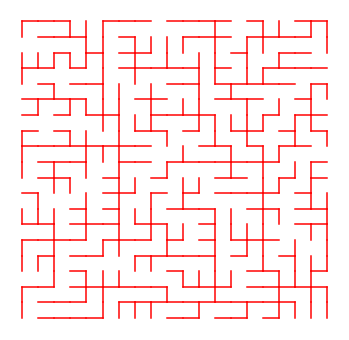

In [182]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.axis('off')

for x in tree_edges[:]:
    X, Y = np.array(x).T
    plt.plot(X,Y,'r')
    

In [22]:
np.random.randint(0,high=size,size=2)

array([12,  8])

---

# Second version getting rid of one of the convolutions

In [115]:
nbs([0,1]), size

([array([1, 1]), array([0, 2]), array([0, 0])], 6)

In [152]:
def nbs(pt):
    #size is global
    moves = np.array([ [1,0,-1,0],[0,1,0,-1]]).T + pt
    return [ x for x in moves if max(x) < size and min(x) > -1]


K = np.zeros((3,3), dtype=np.int8)
K[0,1] = K[1,0] = K[2,1] = K[1,2] = 1

size = 8
V = np.zeros((size,size))
root = np.random.randint(0, high=size, size=2)
V[tuple(root)] = 1

tree_edges = []

In [134]:
for _ in  range(80):
    S = signal.convolve2d( V, K)[1:-1,1:-1]
    frontier = np.array(np.where( S*(1-V) > 0)).T
    if len(frontier) < 1 : break
    new_node = tuple(random.choice(frontier))
    V[new_node] = 1
    # this is a more local version
    parent_node  = random.choice([ x for x in nbs(new_node) if V[tuple(x)]  == 1 ])
    tree_edges.append((new_node, parent_node))


---

# Third verion inlining the helper function

In [183]:
K = np.zeros((3,3), dtype=np.int8)
K[0,1] = K[1,0] = K[2,1] = K[1,2] = 1

#directions
NEWS = np.array([ [1,0,-1,0],[0,1,0,-1]]).T

size = 30
V = np.zeros((size,size))
root = np.random.randint(0, high=size, size=2)
V[tuple(root)] = 1

tree_edges = []

In [184]:
while True:
    # this should be made local
    S = signal.convolve2d( V, K)[1:-1,1:-1]
    frontier = np.array(np.where( S*(1-V) > 0)).T
    if len(frontier) < 1 : break
    new_node = tuple(random.choice(frontier))
    V[new_node] = 1
    # this is a more local version
    moves = NEWS + new_node
    valid_moves = moves[np.all((moves < size) & (moves > -1), axis =1)]
    parent_node = random.choice([ x for x in valid_moves if V[tuple(x)]  == 1 ])
    tree_edges.append((new_node, parent_node))

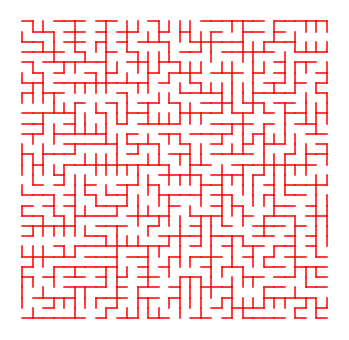

In [185]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.axis('off')

for x in tree_edges[:]:
    X, Y = np.array(x).T
    plt.plot(X,Y,'r')